# Le réseau de neurones le plus simple avec TensorFlow

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras


https://lucidar.me/fr/neural-networks/simplest-neural-netwok-ever/

In [2]:
#création du jeux de données et création du bruit
#y=ax+b

#parametres
a=0.6
b=2

#bruit
x_data= np.linspace(-10,10, num=100000) #Renvoie des nombres régulièrement espacés sur un intervalle spécifié. 
y_data= a*x_data+b+np.random.normal(size=100000) #Tirez des échantillons aléatoires à partir d'une distribution normale



In [3]:
#données construite, création du réseau

#création modele
model0=keras.Sequential()#pile linéaire de couche
model0.add(keras.layers.Dense(units = 1, activation ='linear', input_shape=[1]))
#couche connecté au modele Dense ==== units > nbr de neurone, activation> fonction de transfert, input shape > nombre d'entrée

model0.compile(loss='mse',optimizer="adam")# modele compilé avec param d'optimisation
# adam est un algo d'optimisation voir doc pour info
#loss est l'erreur calculé sur la base des moindre carré voir metrique

model0.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [4]:
#entrainement du réseau grace au modele crée

#apprentissage
model0.fit(x_data, y_data, epochs=5, verbose=1)

#x_data = entrée
#y_data = sortie désirée
#epoch= 5 le réseau sera entrainé 5 fois sur le jeu de données
#verbose =1 affiche la progression


Epoch 1/5
3125/3125 [==============================] - 4s 1ms/step - loss: 4.0678
Epoch 2/5
3125/3125 [==============================] - 3s 1ms/step - loss: 1.0078
Epoch 3/5
3125/3125 [==============================] - 3s 975us/step - loss: 1.0066
Epoch 4/5
3125/3125 [==============================] - 3s 971us/step - loss: 1.0066
Epoch 5/5
3125/3125 [==============================] - 3s 991us/step - loss: 1.0067


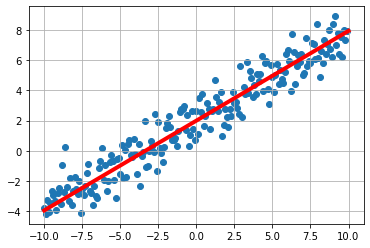

In [5]:
#prediction de l'approximation

#prediction de la sortie 
y_predicted = model0.predict(x_data)

#afficher le résultat
plt.scatter(x_data[::500], y_data[::500])
plt.plot(x_data, y_predicted, 'r', linewidth=4)
plt.grid()
plt.show()

In [6]:
print (model0.trainable_variables)

[<tf.Variable 'dense/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[0.5949254]], dtype=float32)>, <tf.Variable 'dense/bias:0' shape=(1,) dtype=float32, numpy=array([1.993158], dtype=float32)>]


In [7]:
#les poids sont de 0,6 et 2

# Régression non linéaire avec un réseau de neurones

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import math

https://lucidar.me/fr/neural-networks/curve-fitting-nonlinear-regression/

# m = 1/64/64/1

In [9]:
#création données et bruit

x_data1 = np.linspace(-10,10,num=1000)
y_data1 = 0.1*x_data1*np.cos(x_data1) + 0.1*np.random.normal(size=1000)

In [10]:
#creation du modèle

model = keras.Sequential()
model.add(keras.layers.Dense(units =1, activation = 'linear', input_shape=[1]))
model.add(keras.layers.Dense(units = 64, activation = 'relu'))
model.add(keras.layers.Dense(units = 64, activation = 'relu'))
model.add(keras.layers.Dense(units = 1, activation = 'linear'))
model.compile(loss='mse', optimizer='adam')

model.summary()



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                128       
_________________________________________________________________
dense_3 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 65        
Total params: 4,355
Trainable params: 4,355
Non-trainable params: 0
_________________________________________________________________


Epoch 1/100
32/32 - 0s - loss: 0.2094
Epoch 2/100
32/32 - 0s - loss: 0.1924
Epoch 3/100
32/32 - 0s - loss: 0.1922
Epoch 4/100
32/32 - 0s - loss: 0.1915
Epoch 5/100
32/32 - 0s - loss: 0.1881
Epoch 6/100
32/32 - 0s - loss: 0.1881
Epoch 7/100
32/32 - 0s - loss: 0.1897
Epoch 8/100
32/32 - 0s - loss: 0.1836
Epoch 9/100
32/32 - 0s - loss: 0.1919
Epoch 10/100
32/32 - 0s - loss: 0.1879
Epoch 11/100
32/32 - 0s - loss: 0.1808
Epoch 12/100
32/32 - 0s - loss: 0.1762
Epoch 13/100
32/32 - 0s - loss: 0.1712
Epoch 14/100
32/32 - 0s - loss: 0.1711
Epoch 15/100
32/32 - 0s - loss: 0.1598
Epoch 16/100
32/32 - 0s - loss: 0.1578
Epoch 17/100
32/32 - 0s - loss: 0.1513
Epoch 18/100
32/32 - 0s - loss: 0.1464
Epoch 19/100
32/32 - 0s - loss: 0.1319
Epoch 20/100
32/32 - 0s - loss: 0.1294
Epoch 21/100
32/32 - 0s - loss: 0.1157
Epoch 22/100
32/32 - 0s - loss: 0.1066
Epoch 23/100
32/32 - 0s - loss: 0.0994
Epoch 24/100
32/32 - 0s - loss: 0.0856
Epoch 25/100
32/32 - 0s - loss: 0.0731
Epoch 26/100
32/32 - 0s - loss: 0.

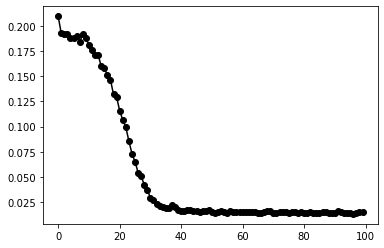

In [11]:
#entrainement
m = model.fit(x_data1, y_data1, epochs=100, verbose=2)
print(m.history)
plt.plot(list(m.history.values())[0],'k-o')

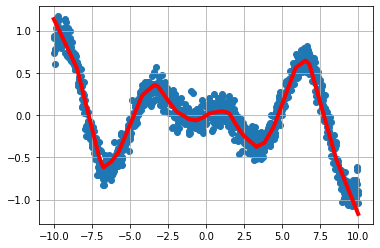

In [12]:
#prédiction de l'approximation
y_predicted1 = model.predict(x_data1)

#résultat
plt.scatter(x_data1[::1], y_data1[::1])
plt.plot(x_data1,y_predicted1, 'r', linewidth=4)
plt.grid()
plt.show()


# m1 = 1/75/64/64/1

In [13]:
x_data2 = np.linspace(-10,10,num=1000)
y_data2 = 0.1*x_data2*np.cos(x_data2) + 0.1*np.random.normal(size=1000)

In [14]:
model2 = keras.Sequential()
model2.add(keras.layers.Dense(units =1, activation = 'linear', input_shape=[1]))
model2.add(keras.layers.Dense(units = 75, activation = 'relu'))
model2.add(keras.layers.Dense(units = 64, activation = 'relu'))
model2.add(keras.layers.Dense(units = 64, activation = 'relu'))
model2.add(keras.layers.Dense(units = 1, activation = 'linear'))
model2.compile(loss='mse', optimizer='adam')

model2.summary()



Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 1)                 2         
_________________________________________________________________
dense_6 (Dense)              (None, 75)                150       
_________________________________________________________________
dense_7 (Dense)              (None, 64)                4864      
_________________________________________________________________
dense_8 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 65        
Total params: 9,241
Trainable params: 9,241
Non-trainable params: 0
_________________________________________________________________


In [15]:
m1 = model2.fit(x_data2, y_data2, epochs=100, verbose=2)
#print(m1.history)
#plt.plot(list(m1.history.values())[0],'k-o')

Epoch 1/100
32/32 - 0s - loss: 0.2075
Epoch 2/100
32/32 - 0s - loss: 0.1881
Epoch 3/100
32/32 - 0s - loss: 0.1910
Epoch 4/100
32/32 - 0s - loss: 0.1944
Epoch 5/100
32/32 - 0s - loss: 0.1904
Epoch 6/100
32/32 - 0s - loss: 0.1859
Epoch 7/100
32/32 - 0s - loss: 0.1899
Epoch 8/100
32/32 - 0s - loss: 0.1822
Epoch 9/100
32/32 - 0s - loss: 0.1836
Epoch 10/100
32/32 - 0s - loss: 0.1790
Epoch 11/100
32/32 - 0s - loss: 0.1801
Epoch 12/100
32/32 - 0s - loss: 0.1775
Epoch 13/100
32/32 - 0s - loss: 0.1699
Epoch 14/100
32/32 - 0s - loss: 0.1650
Epoch 15/100
32/32 - 0s - loss: 0.1630
Epoch 16/100
32/32 - 0s - loss: 0.1531
Epoch 17/100
32/32 - 0s - loss: 0.1393
Epoch 18/100
32/32 - 0s - loss: 0.1244
Epoch 19/100
32/32 - 0s - loss: 0.1161
Epoch 20/100
32/32 - 0s - loss: 0.0925
Epoch 21/100
32/32 - 0s - loss: 0.0766
Epoch 22/100
32/32 - 0s - loss: 0.0622
Epoch 23/100
32/32 - 0s - loss: 0.0458
Epoch 24/100
32/32 - 0s - loss: 0.0345
Epoch 25/100
32/32 - 0s - loss: 0.0274
Epoch 26/100
32/32 - 0s - loss: 0.

# m2 = 10/64/64/1

In [16]:
x_data3 = np.linspace(-10,10,num=1000)
y_data3 = 0.1*x_data3*np.cos(x_data3) + 0.1*np.random.normal(size=1000)
   

In [17]:
model3 = keras.Sequential()
model3.add(keras.layers.Dense(units =10, activation = 'linear', input_shape=[1]))
#model3.add(keras.layers.Dense(units = 75, activation = 'relu'))
model3.add(keras.layers.Dense(units = 64, activation = 'relu'))
model3.add(keras.layers.Dense(units = 64, activation = 'relu'))
model3.add(keras.layers.Dense(units = 1, activation = 'linear'))
model3.compile(loss='mse', optimizer='adam')

model3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_11 (Dense)             (None, 64)                704       
_________________________________________________________________
dense_12 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 65        
Total params: 4,949
Trainable params: 4,949
Non-trainable params: 0
_________________________________________________________________


In [18]:
m2 = model3.fit(x_data3, y_data3, epochs=100, verbose=2)
#print(m2.history)

Epoch 1/100
32/32 - 0s - loss: 0.2534
Epoch 2/100
32/32 - 0s - loss: 0.1928
Epoch 3/100
32/32 - 0s - loss: 0.1990
Epoch 4/100
32/32 - 0s - loss: 0.1917
Epoch 5/100
32/32 - 0s - loss: 0.1926
Epoch 6/100
32/32 - 0s - loss: 0.1911
Epoch 7/100
32/32 - 0s - loss: 0.1879
Epoch 8/100
32/32 - 0s - loss: 0.1887
Epoch 9/100
32/32 - 0s - loss: 0.1907
Epoch 10/100
32/32 - 0s - loss: 0.1852
Epoch 11/100
32/32 - 0s - loss: 0.1936
Epoch 12/100
32/32 - 0s - loss: 0.1917
Epoch 13/100
32/32 - 0s - loss: 0.1904
Epoch 14/100
32/32 - 0s - loss: 0.1791
Epoch 15/100
32/32 - 0s - loss: 0.1821
Epoch 16/100
32/32 - 0s - loss: 0.1835
Epoch 17/100
32/32 - 0s - loss: 0.1753
Epoch 18/100
32/32 - 0s - loss: 0.1715
Epoch 19/100
32/32 - 0s - loss: 0.1735
Epoch 20/100
32/32 - 0s - loss: 0.1578
Epoch 21/100
32/32 - 0s - loss: 0.1521
Epoch 22/100
32/32 - 0s - loss: 0.1547
Epoch 23/100
32/32 - 0s - loss: 0.1408
Epoch 24/100
32/32 - 0s - loss: 0.1274
Epoch 25/100
32/32 - 0s - loss: 0.1197
Epoch 26/100
32/32 - 0s - loss: 0.

# comparaison

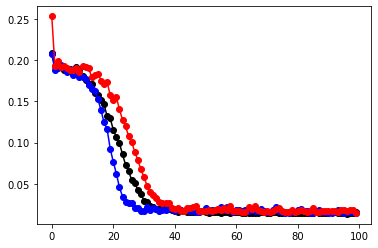

In [19]:
plt.plot(list(m.history.values())[0],'k-o') #1/64/64/1
plt.plot(list(m1.history.values())[0],'b-o') #1/75/64/64/1
plt.plot(list(m2.history.values())[0],'r-o') #10/64/64/1

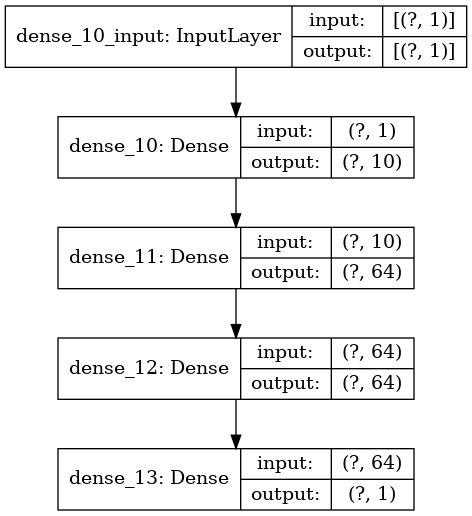

In [34]:
from keras.utils.vis_utils import plot_model, model_to_dot
import pydot
plot_model(model,to_file='model_plot.png', show_shapes=True, show_layer_names=True)

plot_model(model2,to_file='model_plot.png', show_shapes=True, show_layer_names=True)

plot_model(model3,to_file='model_plot.png', show_shapes=True, show_layer_names=True)